In [1]:
import pandas as pd
import numpy as np
import xarray as xr
from scipy import stats
from random import random
from matplotlib import pyplot as plt
import cool_maps.plot as cplt
import cartopy.crs as ccrs
import matplotlib.dates as mdates

In [2]:
# RU34 ECO-PAM Glider Mission Nov - Oct 2020
url  = 'http://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20201119T1533-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-12-14T00%3A00%3A00Z&time%3C=2020-12-21T15%3A51%3A16Z' 
M1Y2020 = pd.read_csv(url, sep=',', skiprows=range(1, 2), parse_dates=['time'])
M1Y2020
# RU34 ECO-PAM Glider Mission Oct - Nov 2020
url  = 'http://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20201003T1821-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-10-29T00%3A00%3A00Z&time%3C=2020-11-05T16%3A39%3A00Z' 
M2Y2020 = pd.read_csv(url, sep=',', skiprows=range(1, 2), parse_dates=['time'])
M2Y2020
# RU34 ECO-PAM Glider Mission Jul - Aug 2020
url  = 'http://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20200729T1430-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-08-19T00%3A00%3A00Z&time%3C=2020-08-26T14%3A59%3A27Z' 
M3Y2020 = pd.read_csv(url, sep=',', skiprows=range(1, 2), parse_dates=['time'])
M3Y2020


,time,latitude,longitude,depth,trajectory,source_file,conductivity,crs,ctd41cp_timestamp,density,...,sci_oxy3835_wphase_ramp,sci_oxy3835_wphase_rawtemp,sci_oxy3835_wphase_rphase,sci_software_ver,sci_water_pressure,sound_speed,temperature,u,v,water_depth
0,2020-08-19 00:01:04+00:00,39.001893,-74.330865,1.835986,ru34-20200729T1430,ru34-2020-228-0-58-dbd(00600058),4.73942,NaN,2020-08-19T00:01:03Z,1021.86163,...,0.0,131.92,0.0,NaN,0.185,1526.3179,22.9917,NaN,NaN,NaN
1,2020-08-19 00:01:05+00:00,39.001895,-74.330864,NaN,ru34-20200729T1430,ru34-2020-228-0-58-dbd(00600058),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-19 00:01:05+00:00,39.001896,-74.330864,NaN,ru34-20200729T1430,ru34-2020-228-0-58-dbd(00600058),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-19 00:01:06+00:00,39.001897,-74.330863,1.895531,ru34-20200729T1430,ru34-2020-228-0-58-dbd(00600058),4.74560,NaN,2020-08-19T00:01:05Z,1021.48630,...,NaN,NaN,NaN,NaN,0.191,1527.2275,23.4829,NaN,NaN,NaN
4,2020-08-19 00:01:07+00:00,39.001899,-74.330863,NaN,ru34-20200729T1430,ru34-2020-228-0-58-dbd(00600058),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236612,2020-08-26 14:59:23+00:00,39.410890,-74.252449,-0.000000,ru34-20200729T1430,ru34-2020-238-0-0-dbd(00620000),4.67171,NaN,2020-08-26T14:59:23Z,1020.73020,...,NaN,NaN,NaN,NaN,-0.000,1527.2947,23.8825,NaN,NaN,NaN
236613,2020-08-26 14:59:24+00:00,39.410889,-74.252450,NaN,ru34-20200729T1430,ru34-2020-238-0-0-dbd(00620000),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236614,2020-08-26 14:59:25+00:00,39.410889,-74.252451,NaN,ru34-20200729T1430,ru34-2020-238-0-0-dbd(00620000),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236615,2020-08-26 14:59:25+00:00,39.410889,-74.252451,0.129011,ru34-20200729T1430,ru34-2020-238-0-0-dbd(00620000),4.67178,NaN,2020-08-26T14:59:25Z,1020.73444,...,NaN,NaN,NaN,NaN,0.013,1527.2904,23.8785,NaN,NaN,NaN


In [3]:
# List of file paths fot tag qualified tag detections (ECO-PAM missions from 2020, 2021, & 2022, and NJDEP Mission from 2022)
file_paths = [  'C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Thesis coding/Qualified Detections/ecopam_qualified_detections_2022/ecopam_qualified_detections_2022.csv',
                'C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Thesis coding/Qualified Detections/ecopam_qualified_detections_2021/ecopam_qualified_detections_2021.csv',
                'C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Thesis coding/Qualified Detections/ecopam_qualified_detections_2020/ecopam_qualified_detections_2020.csv',
                'C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Thesis coding/Qualified Detections/rmigliders_qualified_detections_2022/rmigliders_qualified_detections_2022.csv']

# Initialize an empty list to store DataFrames
all_detections = []

# Loop through each file path
for file_path in file_paths:
    # Read CSV file into DataFrame
    detection_data = pd.read_csv(file_path)
    # Convert 'datecollected' column to datetime
    detection_data['datecollected'] = pd.to_datetime(detection_data['datecollected']).dt.date
    
    # Append the DataFrame to the list
    all_detections.append(detection_data)

# Concatenate all DataFrames in the list into a single DataFrame
combined_detection_data = pd.concat(all_detections, ignore_index=True)

# Convert Epoch Time to Datetime format
combined_detection_data['Time'] = pd.to_datetime(combined_detection_data['datecollected']).dt.date

# Set new time as index and remove old time format
combined_detection_data = combined_detection_data.drop('datecollected', axis=1).set_index('Time').sort_index()
#Groupby Date in terms of unique tag IDs "fieldnumber"
detection_dates = combined_detection_data.groupby('Time')#.fieldnumber.unique()


In [4]:
combined_detection_data

,basisofrecord,institutioncode,collectioncode,datelastmodified,timezone,trackercode,fieldnumber,catalognumber,yearcollected,monthcollected,...,collectornumber,latitude,longitude,rcvrcatnumber,sensorname,sensorraw,the_geom,notes,tag_contact_pi,tag_contact_poc
Time,,,,,,,,,,,,,,,,,,,,,
2020-08-18,MachineObservation,RU-Marine,ECOPAM,2021-04-13,UTC,FACT.BLKTP,A69-9001-23325,A69-9001-23325-1573,2020,8,...,457001,39.08431,-74.31265,slcm-1573,NaN,NaN,01010000000B462575029452C0E65C8AABCA8A4340,NaN,Stephen Kajiura (kajiura@fau.edu),Beth Bowers (mebowers5@gmail.com)
2020-08-18,MachineObservation,RU-Marine,ECOPAM,2021-04-13,UTC,FACT.BLKTP,A69-9001-23325,A69-9001-23325-1572,2020,8,...,457001,39.08425,-74.31266,slcm-1572,NaN,NaN,01010000001CB1169F029452C0105839B4C88A4340,NaN,Stephen Kajiura (kajiura@fau.edu),Beth Bowers (mebowers5@gmail.com)
2020-08-18,MachineObservation,RU-Marine,ECOPAM,2021-04-13,UTC,FACT.BLKTP,A69-9001-23325,A69-9001-23325-1571,2020,8,...,457001,39.08417,-74.31268,slcm-1571,NaN,NaN,01010000004087F9F2029452C0F4A62215C68A4340,NaN,Stephen Kajiura (kajiura@fau.edu),Beth Bowers (mebowers5@gmail.com)
2020-08-19,MachineObservation,RU-Marine,ECOPAM,2021-04-13,UTC,FACT.BLKTP,A69-9001-23325,A69-9001-23325-1579,2020,8,...,457001,39.08464,-74.31257,slcm-1579,NaN,NaN,01010000007CED9925019452C07BF7C77BD58A4340,NaN,Stephen Kajiura (kajiura@fau.edu),Beth Bowers (mebowers5@gmail.com)
2020-08-19,MachineObservation,RU-Marine,ECOPAM,2021-04-13,UTC,FACT.BLKTP,A69-9001-23325,A69-9001-23325-1578,2020,8,...,457001,39.08459,-74.31258,slcm-1578,NaN,NaN,01010000008E588B4F019452C0C9C859D8D38A4340,NaN,Stephen Kajiura (kajiura@fau.edu),Beth Bowers (mebowers5@gmail.com)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-20,MachineObservation,RU-Marine,RMIGLIDERS,2023-02-15,UTC,SBUSOMAS01,A69-9001-64170,A69-9001-64170-12992,2022,9,...,1502896,39.63752,-73.22659,slcm-12992,NaN,NaN,010100000071E65773804E52C0E1455F419AD14340,NaN,Michael Frisk (michael.frisk@stonybrook.edu),NaN
2022-09-30,MachineObservation,RU-Marine,RMIGLIDERS,2023-02-15,UTC,SBUSOMAS01,A69-9001-64179,A69-9001-64179-21186,2022,9,...,1502896,39.16090,-73.72177,slcm-21186,NaN,NaN,0101000000F94ECC7A316E52C094F6065F98944340,NaN,Michael Frisk (michael.frisk@stonybrook.edu),NaN
2022-10-07,MachineObservation,RU-Marine,RMIGLIDERS,2023-11-02,UTC,ASIWHITE,A69-9001-58280,A69-9001-58280-28246,2022,10,...,1502896,38.91340,-74.18589,slcm-28246,NaN,NaN,0101000000D2A92B9FE58B52C04D158C4AEA744340,NaN,Jon Dodd (jonfdodd@gmail.com),Jon Dodd (jonfdodd@gmail.com)


In [5]:
# Get count of unique fieldnumbers detected
unique_field_numbers_count = combined_detection_data['fieldnumber'].nunique()
print("Count of unique field numbers:", unique_field_numbers_count)

Count of unique field numbers: 66


In [6]:
# Print unigque fieldnumbers
unique_field_numbers = combined_detection_data['fieldnumber'].unique()
print("Unique field numbers:")
print(unique_field_numbers)

Unique field numbers:
['A69-9001-23325' 'A69-9001-21820' 'A69-9001-16998' 'A69-9001-13443'
 'A69-9001-6604' 'A69-9001-13411' 'A69-9001-12738' 'A69-9001-11867'
 'A69-9001-12730' 'A69-9001-13438' 'A69-9001-6464' 'A69-9001-18977'
 'A69-9001-6467' 'A69-1602-20957' 'A69-9002-6773' 'A69-9001-21813'
 'A69-9001-21831' 'A69-9001-14331' 'A69-9001-14350' 'A69-9001-2848'
 'A69-1602-20954' 'A69-9001-21793' 'A69-9001-17817' 'A69-9001-21776'
 'A69-9002-6796' 'A69-9002-6760' 'A69-9002-6764' 'A69-9002-6767'
 'A69-9002-6776' 'A69-9006-11390' 'A69-9001-21830' 'A69-9001-17812'
 'A69-1602-20952' 'A69-1602-20938' 'A69-9001-18629' 'A69-9001-21947'
 'A69-9001-18604' 'A69-9001-26045' 'A69-9001-7391' 'A69-9001-26719'
 'A69-9001-21950' 'A69-9001-23922' 'A69-9001-18594' 'A69-9001-14357'
 'A69-9001-14368' 'A69-9001-14364' 'A69-9007-6369' 'A69-9007-6370'
 'A69-9004-14316' 'A69-1602-49608' 'A69-9001-6609' 'A69-1604-32503'
 'A69-9001-23978' 'A69-1602-55958' 'A69-9001-14271' 'A69-9001-5324'
 'A69-9001-12078' 'A69-9001

In [7]:
# Group by time and get number of detetions for each date
date_counts = combined_detection_data.groupby('Time').size()
# Get Date with most detections
max_detections_date = date_counts.idxmax()
# Get Count of detections on date with most detections
max_detections_count = date_counts.max()
print(f"The date with the most detections is {max_detections_date} with {max_detections_count} detections.")

The date with the most detections is 2022-06-02 with 395 detections.


In [8]:
max_detections_date

datetime.date(2022, 6, 2)

In [9]:
# Get number of unique fieldnumbers detected on a single date
unique_counts_per_date = combined_detection_data.groupby('Time')['fieldnumber'].nunique()
# Get the date with the most unique fieldnumbers
max_unique_fieldnumbers_date = unique_counts_per_date.idxmax()
# Get the Count of unique fieldnumbers on date with most unique fieldnumbers
max_unique_fieldnumbers_count = unique_counts_per_date.max()
print(f"The date with the most unique fieldnumbers is {max_unique_fieldnumbers_date} with {max_unique_fieldnumbers_count} unique fieldnumbers.")

The date with the most unique fieldnumbers is 2020-12-09 with 11 unique fieldnumbers.


In [10]:
# Get number of unique fieldnumbers detected on a single date
unique_counts_per_date = combined_detection_data.groupby(level=0)['fieldnumber'].nunique()
# Get the date with the most unique fieldnumbers
max_unique_fieldnumbers_date = unique_counts_per_date.idxmax()
# Get the date with the highest count of unique field numbers
max_date_data = combined_detection_data.loc[max_unique_fieldnumbers_date]
# Get the unique field numbers for the max date
unique_fieldnumbers_max_date = max_date_data['fieldnumber'].unique()
print(f"The date with the most unique fieldnumbers is {max_unique_fieldnumbers_date} with {unique_counts_per_date[max_unique_fieldnumbers_date]} unique fieldnumbers.")
print("Unique field numbers on that date:")
print(unique_fieldnumbers_max_date)

The date with the most unique fieldnumbers is 2020-12-09 with 11 unique fieldnumbers.
Unique field numbers on that date:
['A69-1602-20954' 'A69-9001-21793' 'A69-9001-17817' 'A69-9001-21776'
 'A69-9002-6796' 'A69-9002-6760' 'A69-9002-6764' 'A69-9002-6767'
 'A69-9002-6776' 'A69-9006-11390' 'A69-9001-21830']


In [11]:
# Get number of unique fieldnumbers detected on a single date
unique_counts_per_date = combined_detection_data.groupby(level=0)['fieldnumber'].nunique()

# Get the top 5 dates with the most unique fieldnumber values
top_5_dates = unique_counts_per_date.nlargest(5)

# Loop through each of the top 5 dates
for date, count in top_5_dates.items():
    # Get the date
    date_data = combined_detection_data.loc[date]
    # Get the unique fieldnumbers for the date
    unique_fieldnumbers_date = date_data['fieldnumber'].unique()
    print(f"Date: {date}, Unique Fieldnumbers Count: {count}")
    print("Unique Fieldnumbers:")
    print(unique_fieldnumbers_date)
    print()  # Add a blank line for separation

Date: 2020-12-09, Unique Fieldnumbers Count: 11
Unique Fieldnumbers:
['A69-1602-20954' 'A69-9001-21793' 'A69-9001-17817' 'A69-9001-21776'
 'A69-9002-6796' 'A69-9002-6760' 'A69-9002-6764' 'A69-9002-6767'
 'A69-9002-6776' 'A69-9006-11390' 'A69-9001-21830']

Date: 2020-12-10, Unique Fieldnumbers Count: 6
Unique Fieldnumbers:
['A69-1602-20954' 'A69-9001-17812' 'A69-1602-20952' 'A69-9001-21830'
 'A69-9001-21793' 'A69-1602-20938']

Date: 2020-12-14, Unique Fieldnumbers Count: 5
Unique Fieldnumbers:
['A69-9001-26045' 'A69-9001-7391' 'A69-9001-26719' 'A69-9001-21950'
 'A69-9001-21947']

Date: 2020-11-21, Unique Fieldnumbers Count: 3
Unique Fieldnumbers:
['A69-9001-21813' 'A69-9001-21831' 'A69-9001-14331']

Date: 2020-12-13, Unique Fieldnumbers Count: 3
Unique Fieldnumbers:
['A69-9001-21947' 'A69-9001-18604' 'A69-9001-26045']



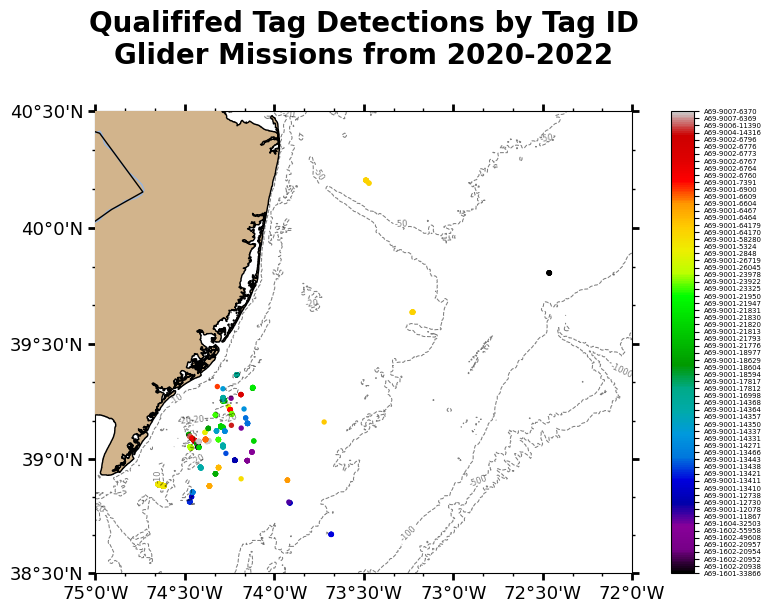

In [12]:
# Assign each fieldnumber a numerical value
combined_detection_data['fieldnumber_code'] = combined_detection_data['fieldnumber'].astype('category').cat.codes
# Set Extent of Map
extent     = [-75, -72, 38.5, 40.5]
# Set Marker size
markersize = 15;
# Create the plot with the Mercator projections
fig,ax  = cplt.create(extent, proj=ccrs.Mercator(), bathymetry=True, isobaths=(-1000, -500, -100, -50, -20, -10), figsize=(10,6), oceancolor='w')
# Plot the location of the detections and color by fieldnumber
ax_posi = plt.scatter(combined_detection_data['longitude'],combined_detection_data['latitude'],c=combined_detection_data['fieldnumber_code'],s=markersize, marker="o", edgecolors='none',cmap='nipy_spectral', transform=ccrs.PlateCarree())

plt.title('Qualififed Tag Detections by Tag ID\nGlider Missions from 2020-2022',y=1.1, fontsize=20, fontweight='bold', pad=0.5);
cbar = plt.colorbar(ax_posi)

# Set Color Bar tick positions and labels
unique_field_numbers = combined_detection_data['fieldnumber_code'].unique()
cbar.set_ticks(unique_field_numbers)
cbar.set_ticklabels(combined_detection_data['fieldnumber'].unique())
cbar.ax.tick_params(labelsize=5)

plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/qualified_tag_detections_BYTAG.png', dpi=300, bbox_inches='tight')

In [13]:
# Ensure all data has been plotted
num_points_plotted = len(combined_detection_data['longitude'])
print("Number of points plotted:", num_points_plotted)

Number of points plotted: 1067


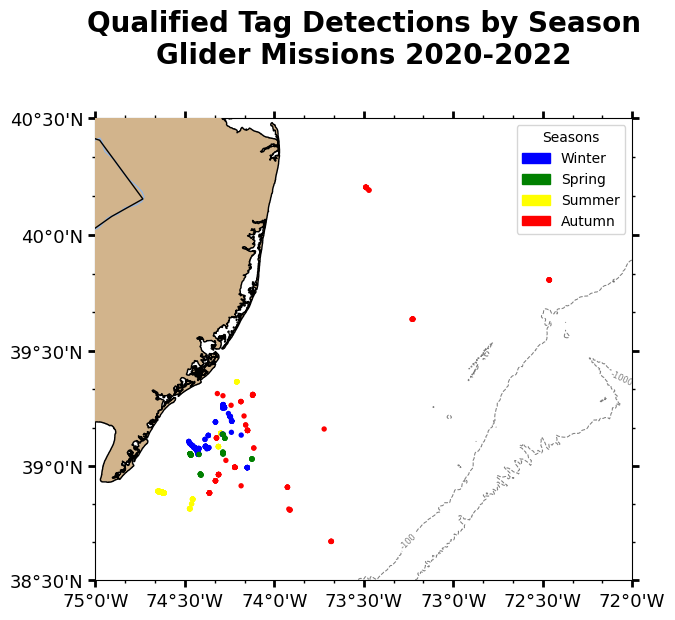

In [14]:
# Define Function to assign each detections a season by grabbing the detections date
def get_season(date):
    # Get the month from each date
    month = date.month
    # Assign season based on month number
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply get_season Function to date index
combined_detection_data['Season'] = combined_detection_data.index.map(get_season)

# Assign a color for each season
season_colors = {
    'Winter': 'blue',   
    'Spring': 'green',  
    'Summer': 'yellow', 
    'Autumn': 'red'     
}

# Apply the color mapping
colors = combined_detection_data['Season'].map(season_colors)

# Create the plot with the Mercator projections
fig, ax = cplt.create(extent, proj=ccrs.Mercator(), bathymetry=True, figsize=(10,6), oceancolor='w')
# Plot Detections colored by season
ax_posi = plt.scatter(combined_detection_data['longitude'], combined_detection_data['latitude'],
                      color=colors, s=markersize, marker="o", edgecolors='none', transform=ccrs.PlateCarree())

plt.title('Qualified Tag Detections by Season\nGlider Missions 2020-2022', y=1.1, fontsize=20, fontweight='bold');

# Manually creating a legend for the seasons
from matplotlib.patches import Patch
# Create a list of matplotlib 'Patch' objects for each key in 'season_colors' dictionary. 
# Each 'Patch' represents a color and a label corresponding to a season.
legend_elements = [Patch(facecolor=season_colors[season], edgecolor=season_colors[season], label=season) for season in season_colors]
plt.legend(handles=legend_elements, loc='upper right', title="Seasons")

plt.savefig('qualified_tag_detections_BYSEASON.png', dpi=300, bbox_inches='tight')


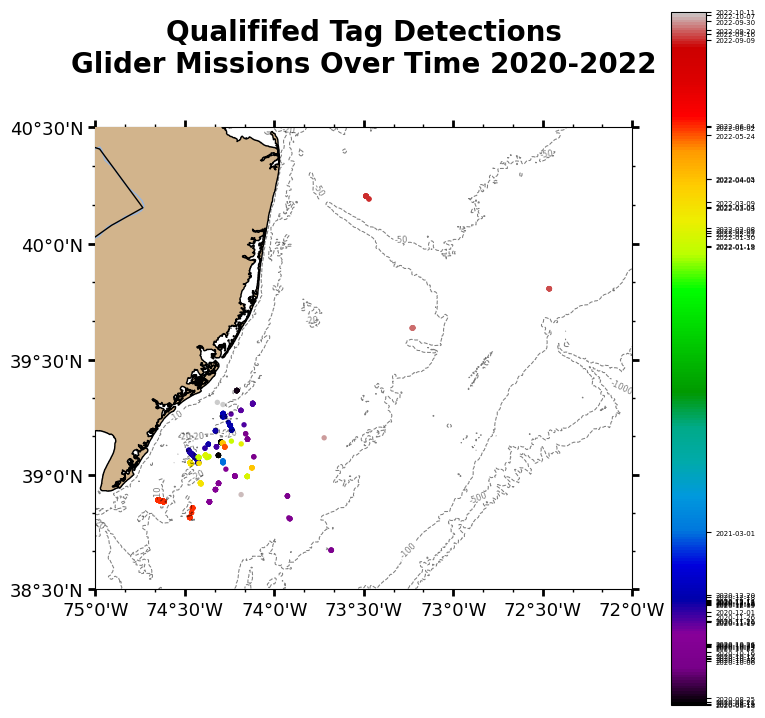

In [15]:
# Set Extent of Map
extent     = [-75, -72, 38.5, 40.5]
# Set Marker size
markersize = 15;
# Convert Dates to numbers
timestamps = mdates.date2num(combined_detection_data.index)
# Create the plot with the Mercator projections
fig,ax  = cplt.create(extent, proj=ccrs.Mercator(), bathymetry=True, isobaths=(-1000, -500, -100, -50, -20, -10), figsize=(10,6), oceancolor='w')
# Plot the detections colored by Date
ax_posi = plt.scatter(combined_detection_data['longitude'],combined_detection_data['latitude'],c=timestamps,s=markersize, marker="o", edgecolors='none',cmap='nipy_spectral', transform=ccrs.PlateCarree())

plt.title('Qualififed Tag Detections\nGlider Missions Over Time 2020-2022', y=1.1, fontsize=20, fontweight='bold');

cbar = plt.colorbar(ax_posi, shrink= 1.5)

# Set Color Bar tick positions and labels
unique_dates = combined_detection_data.index.unique()
cbar.set_ticks(mdates.date2num(unique_dates))
cbar.set_ticklabels(unique_dates)

cbar.ax.tick_params(labelsize=5)

plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/qualified_tag_detections_BYDATE.png', dpi=300, bbox_inches='tight')

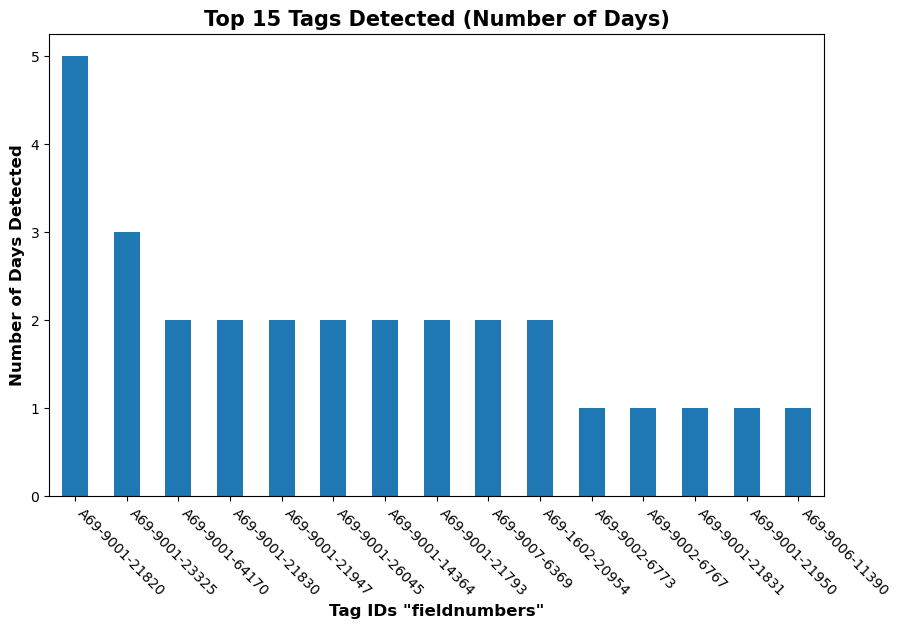

In [16]:
# Group by fieldnumber and get number of unique dates
tag_days_count = combined_detection_data.groupby('fieldnumber').apply(lambda x: x.index.nunique())
# Sort Descending and grab Top 15
top_15_tags_days = tag_days_count.sort_values(ascending=False).head(15)
# Plot the number of Dates each fieldnumber is detected for the Top 15 
top_15_tags_days.plot(kind='bar', figsize=(10, 6))
plt.title('Top 15 Tags Detected (Number of Days)', fontsize=15, fontweight='bold')
plt.xlabel('Tag IDs "fieldnumbers"', fontsize=12, fontweight='bold')
plt.ylabel('Number of Days Detected', fontsize=12, fontweight='bold')
plt.xticks(rotation=-45, ha='left')

plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Top15_Tags_numb_days.png', dpi=300, bbox_inches='tight')

plt.show()

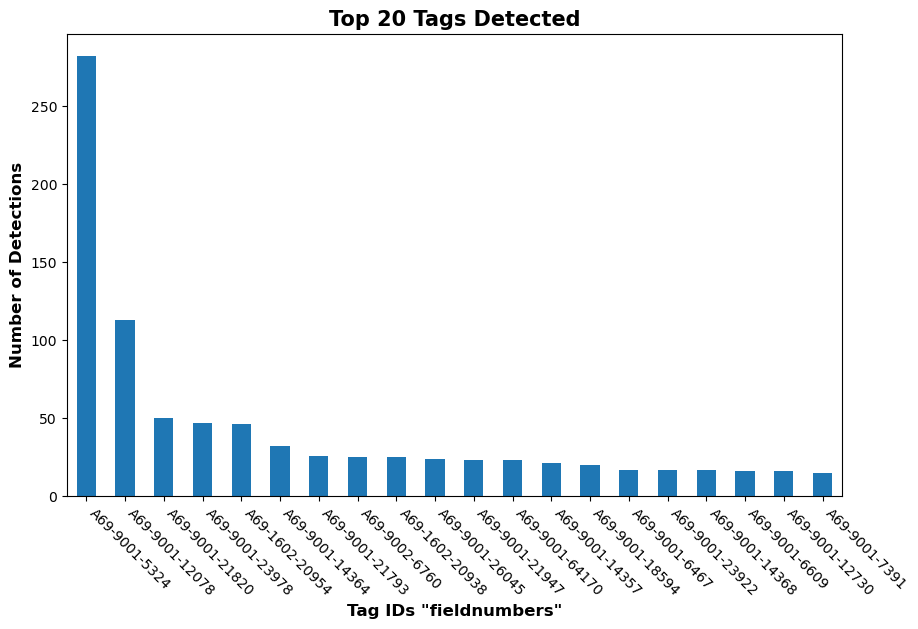

In [17]:
# Get number of Detections for each  unique fieldnumber
tag_counts = combined_detection_data['fieldnumber'].value_counts()
# Grab Top 20 
top_20_tags = tag_counts.sort_values(ascending=False).head(20)
# Plot Top 20 Detected fieldnumbers
top_20_tags.plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Tags Detected', fontsize=15, fontweight='bold')
plt.xlabel('Tag IDs "fieldnumbers"', fontsize=12, fontweight='bold')
plt.ylabel('Number of Detections', fontsize=12, fontweight='bold')
plt.xticks(rotation=-45, ha='left')

plt.savefig('C:/Users/scott/Desktop/RUCOOL_Software_Bootcamp/Top20_Tags_Detected.png', dpi=300, bbox_inches='tight')

plt.show()